Explode functions allow to creare rows for each element of a list inside a row

In [29]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_exploded = df.explode('job_skills')
df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1


<Axes: xlabel='Skill', ylabel='Count'>

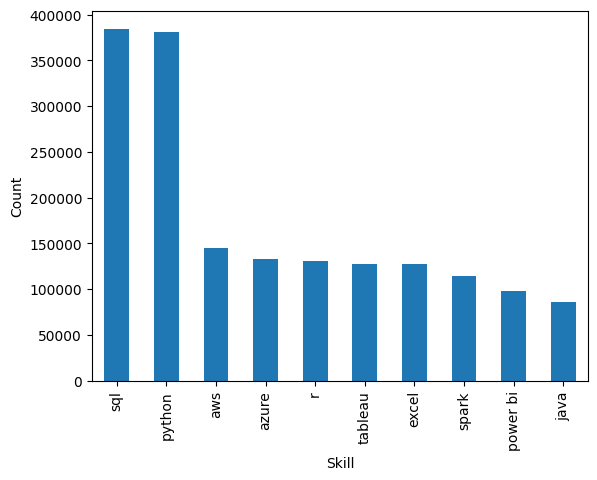

In [3]:
top_skills = df_exploded['job_skills'].value_counts().head(10)
top_skills.plot(kind='bar', xlabel='Skill', ylabel='Count')

In [4]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size() # type series

df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count


,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


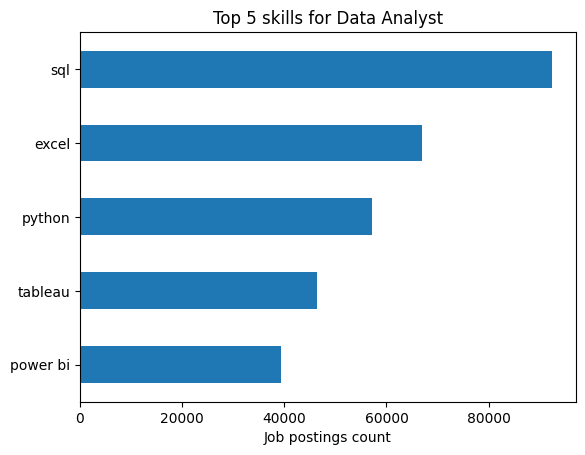

In [5]:
job_title = 'Data Analyst'
top_skills = 5

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skill_final.plot(kind='barh', x='job_skills', y='skill_count', xlabel='Job postings count', ylabel='') 
plt.gca().invert_yaxis() # invert y axis
plt.title(f'Top {top_skills} skills for {job_title}') # flexible title
plt.legend().set_visible(False) # remove legend


### Exercises

🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1) - Problem
Pandas Explode
Problem Statement:

- Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.
    - NOTE: For future problems, it'll be assumed that you have done this step in preparation for exploding this column.
- Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
- Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.

Hint:

Filter out the DataFrame to only get Cloud Engineer jobs and use the explode() function on the job_skills column, then use value_counts(), and finally use plot() to create a bar plot.

<Axes: title={'center': 'Top 10 Most Common Skills for Cloud Engineers'}, xlabel='Skills', ylabel='Count'>

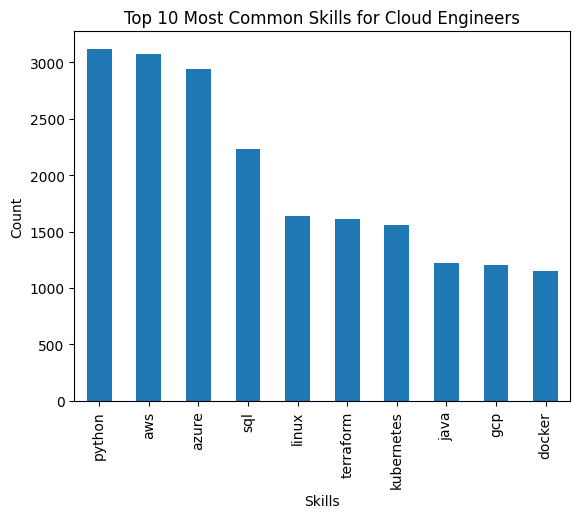

In [30]:
df_cloud = df.copy()
df_cloud = df_cloud[df_cloud['job_title_short'] == 'Cloud Engineer']
df_exploded = df_cloud.explode('job_skills')
skills_count = df_exploded['job_skills'].value_counts().nlargest(10)
skills_count.plot(kind='bar', xlabel='Skills', ylabel='Count', title='Top 10 Most Common Skills for Cloud Engineers')

🟨 Average Salary by Skill (2.11.2) - Problem
Pandas Explode
Problem Statement:

Explode the job_skills column in the DataFrame and calculate the average salary for each skill. Display the top 5 skills with the highest average salary.
Hint:

Use the explode() function on the job_skills column.

In [ ]:
df_exploded = df.explode('job_skills').copy()
top_5_skills = df_exploded.groupby('job_skills')['salary_year_avg'].mean().nlargest(5)
top_5_skills #not in df format

job_skills
debian         196500.000000
ringcentral    182500.000000
lua            170500.000000
mongo          169526.929749
dplyr          160667.210526
Name: salary_year_avg, dtype: float64

In [ ]:
# another version (df format)
df_exploded = df.explode('job_skills').copy()
top_5_skills = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
top_5_skills = top_5_skills.sort_values(by='salary_year_avg', ascending=False).head(5)
top_5_skills

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526



🟥 Unique Skills Count (2.11.3) - Problem
Pandas Explode
Problem Statement:

Calculate the number of unique skills required for each job_title_short.

    - Explode the job_skills column

    - Group by job_title_short

    - Count unique skills per title (i.e., num_unique_skills)

    - Rename the result column to num_unique_skills and show the first 5 rows

Hint:

Use the explode() function on the job_skills column, then group by job_title_short and use nunique() to count the number of unique skills for each job posting.


In [63]:
df_skills = df.explode('job_skills')
job_skills = df_skills.groupby('job_title_short')['job_skills'].unique().reset_index()
job_skills['job_skills'].to_list()
job_skills['num_unique_skills'] = job_skills['job_skills'].apply(len)
job_skills.head()

,job_title_short,job_skills,num_unique_skills
0,Business Analyst,"[excel, powerpoint, power bi, r, python, sql, ...",224
1,Cloud Engineer,"[javascript, python, gcp, aws, selenium, node,...",214
2,Data Analyst,"[r, python, sql, nosql, power bi, tableau, php...",236
3,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,...",240
4,Data Scientist,"[sql, python, r, mongodb, sql server, azure, p...",238


In [64]:
# other version
df_exploded = df.explode('job_skills')
unique_skills_count = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
unique_skills_count.columns = ['job_title_short', 'num_unique_skills']
unique_skills_count.head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
